In [12]:
# this code gives the implementation of gradient descent algothim
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
X_train = np.array([1.0, 2.0])
y_train = np.array([300.0, 500.0])

In [3]:
w = 200
b = 100

In [ ]:
def compute_cost(x, y, w, b):
    """
    Compute the cost function for linear regression.

    Args:
        x (ndarray(m,)): Input features, m examples
        y (ndarray(m,)): Target values
        w (float): Weight parameter
        b (float): Bias parameter

    Returns:
        float: The cost (mean squared error / 2) of using w, b as parameters
               to fit the data points x and y.
    """
    m = x.shape[0]  # number of training examples
    cost_sum = 0.0

    # Loop through all training examples
    for i in range(m):
        f_wb = w * x[i] + b       # prediction
        cost = (f_wb - y[i])**2   # squared error
        cost_sum += cost

    # Average cost
    total_cost = (1 / (2 * m)) * cost_sum
    return total_cost


In [5]:
cost = compute_cost(X_train, y_train, w, b)

print(f"cost at w = {w}, b = {b} : {cost} ")

cost at w = 200, b = 100 : 0.0 


In [8]:
# gradient descent determines the values of w, b that minimize the cost function
# 1st we will calculate gradient than gradient descent

def compute_gradient(x, y, w, b):
    """
    Computes the gradient for linear regression.
    Args:
        x (ndarray (m,)) : Data, m examples.
        y (ndarrat (m,)) : target values.
        w, b (scalar)    : model parameters.

    Returns:
        d_w (scalar): The gradient of cost w.r.t the parameter w.
        d_b (scalar): The gradient of cost w.r.t the parameter b.

    
    """
    # gradient is calculating derivative
    gradient_w_sum = 0
    gradient_b_sum = 0

    m = len(x)

    for i in range(m):

        f_wb = w*x[i] + b

        gradient_w_i = (f_wb - y[i])*x[i]
        gradient_b_i = (f_wb - y[i])

        gradient_w_sum += gradient_w_i
        gradient_b_sum += gradient_b_i

    d_w = (1/m)*gradient_w_sum
    d_b = (1/m)*gradient_b_sum

    return d_w, d_b

        

        

In [44]:
# this implement the gradient descent for various values

def gradient_descent(X, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function): 

    """
    Performs gradient descent to fit w, b. Updates w, b by taking 
    num_iters gradient steps with leanring rate alpha

    Args:
        x (ndarray (m,))    : Data, m examples
        y (ndarray (m,))    : target values
        w_in, b_in (scalar) : intial values of model parameters
        alpha (float)       : learning rate
        num_iters(int)      : no. of iterations to run gradient descent
        cost_function       : function to call to produce cost
        gradient_function   : function to call to produce gradient

    Returns:
        w (scalar)      : Updated value of parameter after running gradient descent
        b (scalar)      : Updated value of parameter after running gradient descent
        J_histoty (list): History of cost values
        p_history (list): History of parameters [w, b]
    """


    J_history = []
    p_history = []

    b = b_in
    w = w_in

    for i in range(num_iters):
        dj_dw, dj_db = compute_gradient(X,y,w,b)

        b = b - alpha * dj_db
        w = w - alpha * dj_dw

        if i<100000:
            J_history.append(cost_function(X, y, w , b))
            p_history.append([w, b])


        if i % math.ceil(len(X)/10) == 0:
            print(f"Iteration {i:4} : Cost {J_history[-1] : 0.2e}",
                  f"dj_dw : {dj_dw : 0.3e}, dj_dw : {dj_db : 0.3e}",
                  f"w : {w : 0.3e}, b : {b : 0.5e}")

    return w, b, J_history, p_history     
        

In [ ]:
# this demonstrate the use of math.ceil

num_iters = 77   # total iterations
for i in range(num_iters + 1):   # loop from 0 to 50
    if i % math.ceil(num_iters/10) == 0:
        print(f"Checkpoint at iteration {i}")


Checkpoint at iteration 0
Checkpoint at iteration 8
Checkpoint at iteration 16
Checkpoint at iteration 24
Checkpoint at iteration 32
Checkpoint at iteration 40
Checkpoint at iteration 48
Checkpoint at iteration 56
Checkpoint at iteration 64
Checkpoint at iteration 72
spaced: 0
spaced: 1
spaced: 2
spaced: 3
spaced: 4
spaced: 5
spaced: 6
spaced: 7
spaced: 8
spaced: 9
spaced:10
spaced:11
spaced:12
spaced:13
spaced:14
spaced:15
spaced:16
spaced:17
spaced:18
spaced:19
1.23e-06


In [ ]:
for i in range(20):
    print(f"spaced:{i:2}")


spaced: 0
spaced: 1
spaced: 2
spaced: 3
spaced: 4
spaced: 5
spaced: 6
spaced: 7
spaced: 8
spaced: 9
spaced:10
spaced:11
spaced:12
spaced:13
spaced:14
spaced:15
spaced:16
spaced:17
spaced:18
spaced:19


In [ ]:
value = 0.00000123456
print(f"{value:0.2e}") # effectively convert in power of e, with 2 digits after the decimal


1.23e-06


In [51]:
# this is chat gpt improved:
import math

def gradient_descent1(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function, verbose=True):
    """
    Performs gradient descent to fit w, b.
    Updates w, b by taking num_iters gradient steps with learning rate alpha.

    Args:
        x (ndarray (m,))    : Data, m examples
        y (ndarray (m,))    : Target values
        w_in, b_in (scalar) : Initial values of model parameters
        alpha (float)       : Learning rate
        num_iters (int)     : Number of iterations to run gradient descent
        cost_function       : Function to compute cost
        gradient_function   : Function to compute gradient
        verbose (bool)      : If True, prints progress every ~10% iterations

    Returns:
        w (scalar)       : Updated parameter after gradient descent
        b (scalar)       : Updated parameter after gradient descent
        J_history (list) : History of cost values
        p_history (list) : History of parameters [w, b]
    """

    J_history = []
    p_history = []

    w, b = w_in, b_in

    for i in range(num_iters):
        dj_dw, dj_db = gradient_function(x, y, w, b)

        # update parameters
        w -= alpha * dj_dw
        b -= alpha * dj_db

        # record history
        if i < 100000:   # safety check
            J_history.append(cost_function(x, y, w, b))
            p_history.append([w, b])

        # print progress
        if verbose and i % max(1, math.ceil(num_iters/10)) == 0:
            print(f"Iteration {i:4}: "
                  f"Cost {J_history[-1]:0.2e}, "
                  f"dj_dw {dj_dw:0.3e}, dj_db {dj_db:0.3e}, "
                  f"w {w:0.3e}, b {b:0.3e}")

    return w, b, J_history, p_history


In [45]:
# initialize parameters
w_init = 0
b_init = 0
# some gradient descent settings
iterations = 10000
tmp_alpha = 1.0e-2
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(X_train ,y_train, w_init, b_init, tmp_alpha, 
                                                    iterations, compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

Iteration    0 : Cost  7.93e+04 dj_dw : -6.500e+02, dj_dw : -4.000e+02 w :  6.500e+00, b :  4.00000e+00
Iteration    1 : Cost  7.39e+04 dj_dw : -6.278e+02, dj_dw : -3.862e+02 w :  1.278e+01, b :  7.86250e+00
Iteration    2 : Cost  6.90e+04 dj_dw : -6.063e+02, dj_dw : -3.730e+02 w :  1.884e+01, b :  1.15922e+01
Iteration    3 : Cost  6.43e+04 dj_dw : -5.855e+02, dj_dw : -3.601e+02 w :  2.470e+01, b :  1.51937e+01
Iteration    4 : Cost  6.00e+04 dj_dw : -5.655e+02, dj_dw : -3.478e+02 w :  3.035e+01, b :  1.86713e+01
Iteration    5 : Cost  5.59e+04 dj_dw : -5.461e+02, dj_dw : -3.358e+02 w :  3.581e+01, b :  2.20294e+01
Iteration    6 : Cost  5.22e+04 dj_dw : -5.274e+02, dj_dw : -3.243e+02 w :  4.109e+01, b :  2.52719e+01
Iteration    7 : Cost  4.87e+04 dj_dw : -5.094e+02, dj_dw : -3.131e+02 w :  4.618e+01, b :  2.84029e+01
Iteration    8 : Cost  4.54e+04 dj_dw : -4.919e+02, dj_dw : -3.023e+02 w :  5.110e+01, b :  3.14262e+01
Iteration    9 : Cost  4.23e+04 dj_dw : -4.751e+02, dj_dw : -2.9

In [54]:
# testing chat gpt version
# initialize parameters
w_init = 0
b_init = 0


# some gradient descent settings
iterations = 10000
tmp_alpha = 1.0e-2


# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent1(X_train ,y_train, w_init, b_init, tmp_alpha, iterations, compute_cost, compute_gradient)

print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

Iteration    0: Cost 7.93e+04, dj_dw -6.500e+02, dj_db -4.000e+02, w 6.500e+00, b 4.000e+00
Iteration 1000: Cost 3.41e+00, dj_dw -3.712e-01, dj_db 6.007e-01, w 1.949e+02, b 1.082e+02
Iteration 2000: Cost 7.93e-01, dj_dw -1.789e-01, dj_db 2.895e-01, w 1.975e+02, b 1.040e+02
Iteration 3000: Cost 1.84e-01, dj_dw -8.625e-02, dj_db 1.396e-01, w 1.988e+02, b 1.019e+02
Iteration 4000: Cost 4.28e-02, dj_dw -4.158e-02, dj_db 6.727e-02, w 1.994e+02, b 1.009e+02
Iteration 5000: Cost 9.95e-03, dj_dw -2.004e-02, dj_db 3.243e-02, w 1.997e+02, b 1.004e+02
Iteration 6000: Cost 2.31e-03, dj_dw -9.660e-03, dj_db 1.563e-02, w 1.999e+02, b 1.002e+02
Iteration 7000: Cost 5.37e-04, dj_dw -4.657e-03, dj_db 7.535e-03, w 1.999e+02, b 1.001e+02
Iteration 8000: Cost 1.25e-04, dj_dw -2.245e-03, dj_db 3.632e-03, w 2.000e+02, b 1.000e+02
Iteration 9000: Cost 2.90e-05, dj_dw -1.082e-03, dj_db 1.751e-03, w 2.000e+02, b 1.000e+02
(w,b) found by gradient descent: (199.9929,100.0116)


The ChatGPT version is runnning more smoothly, and you can decide whether you want detailed output or you want final output only by using verbose = True or False

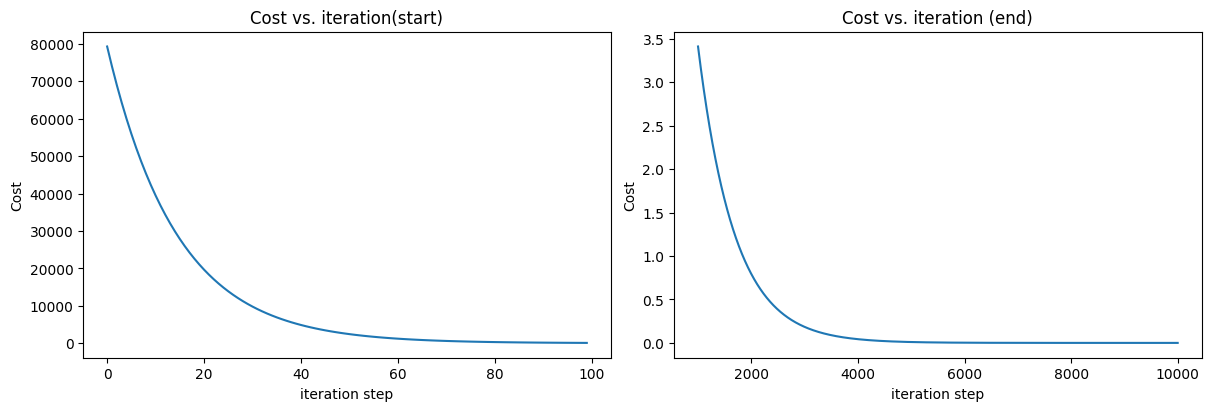

In [55]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_hist[:100])
ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()